## Đa Cộng Tuyến (Multicollinearity)

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
                "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("data/housing.csv", 
                     header=None, 
                     delimiter=r"\s+",
                     names=column_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


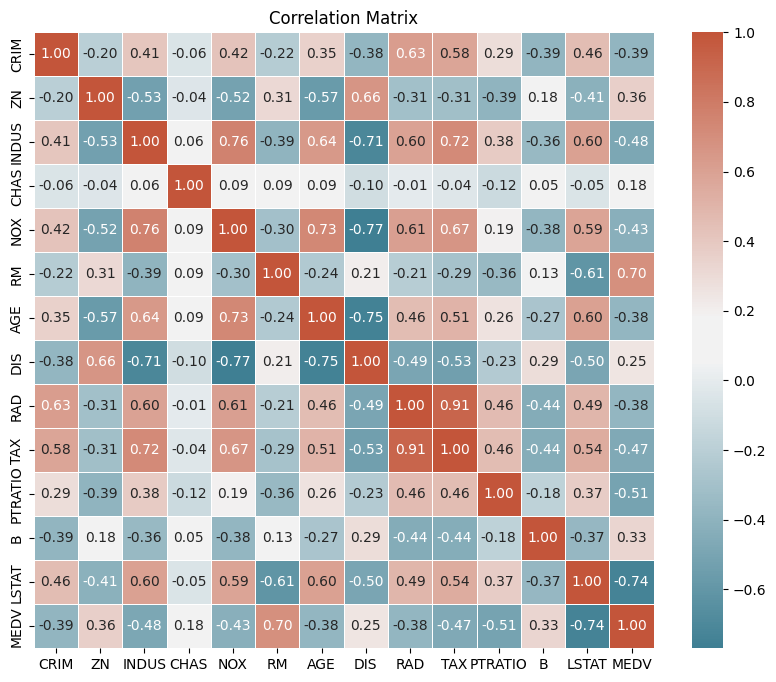

In [140]:
corr_matrix = boston.corr()

# Create a diverging color palette
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Display the correlation matrix with color
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [118]:
# columns_list = list(boston.columns)

# scaled_map = {}

# for col in columns_list:
#     scaler = RobustScaler()
#     X = boston[col].values.reshape(-1, 1)
#     X_scaled = scaler.fit_transform(X)
#     scaled_map[col] = X_scaled.flatten()

# scaled_input = pd.DataFrame(scaled_map)
# scaled_input.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
116,-0.034751,0.00,0.024787,0.0,0.051429,-0.044038,-0.101937,-0.154570,0.05,0.263566,-0.446429,0.089219,0.067966,0.000000
51,-0.059287,1.68,-0.313710,0.0,-0.565714,-0.126694,-0.295617,1.168056,-0.05,-0.224806,-0.803571,0.121357,-0.192904,-0.087774
423,1.889802,0.00,0.651433,0.0,0.434286,-0.142954,0.154944,-0.383923,0.95,0.868217,0.410714,-18.655474,1.192404,-0.978056
96,-0.039351,0.00,-0.526723,0.0,-0.531429,-0.061653,-0.161060,0.093176,-0.15,-0.139535,-0.375000,0.018707,-0.001999,0.025078
77,-0.047132,0.00,0.243222,0.0,-0.577143,-0.092818,-0.646279,0.285939,0.00,0.175711,-0.125000,-0.214894,-0.108946,-0.050157


#### Use 2 column

In [142]:
X = boston[['RM', 'LSTAT']]
y = boston['MEDV']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:
intercept = model.intercept_ 
slope = model.coef_
print(intercept, slope)

-3.841177079004865 [ 5.46509877 -0.63249856]


In [146]:
# Đánh giá trên test
print("model.score:", model.score(X_test, y_test))
print("r2_score:", r2_score(y_test, model.predict(X_test)))

model.score: 0.5739577415025859
r2_score: 0.5739577415025859


##### Fixing Multicollinearity

In [154]:
X = boston[['RM', 'LSTAT']]
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

X_train_corr = X_train.copy()
X_train_corr['LSTAT_div_RM'] = X_train_corr['LSTAT'] / X_train_corr['RM']
# X_train_corr = X_train_corr.drop(['RM'], axis=1)

X_test_corr = X_test.copy()
X_test_corr['LSTAT_div_RM'] = X_test_corr['LSTAT'] / X_test_corr['RM']
# X_test_corr = X_test_corr.drop(['RM'], axis=1)

model_after = LinearRegression()
model_after.fit(X_train_corr, y_train)

y_pred_after = model_after.predict(X_test_corr)

print("R2 sau khi xử lý đa cộng tuyến:", model_after.score(X_test_corr, y_test))

R2 sau khi xử lý đa cộng tuyến: 0.7102833000953939


#### Use all column

In [149]:
X = boston[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
                "TAX", "PTRATIO", "B", "LSTAT"]]
y = boston['MEDV']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
intercept = model.intercept_ 
slope = model.coef_
print(intercept, slope)

30.24675099392349 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [153]:
# Đánh giá trên test
print("model.score:", model.score(X_test, y_test))
print("r2_score:", r2_score(y_test, model.predict(X_test)))

model.score: 0.6687594935356317
r2_score: 0.6687594935356317
